In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import logistic
from scipy.stats import norm
import numpy as np

# Probability distributions

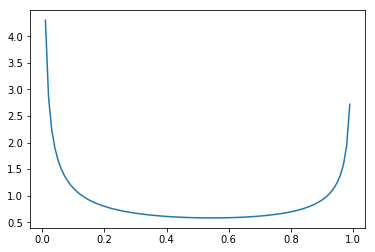

In [9]:
# beta distribution
rv = beta(0.4,0.5)
x = np.linspace(0,1,100)
plt.plot(x, rv.pdf(x));

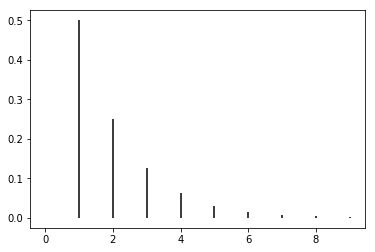

In [10]:
# geometric distribution
rv = geom(0.5)
x = np.arange(0,10)
plt.vlines(x, 0, rv.pmf(x));

In [11]:
# compute mean of geom(0.3) by simulation 
rv = geom(0.3)
samples = rv.rvs(size=1000)
print('meanmc ', np.mean(samples))
print('exact mean', 1/0.3)

meanmc  3.263
exact mean 3.3333333333333335


We know that $$\underset{x^2 + y ^2 < 1}{\int\int}1dxdy = \pi$$

We can compute the integration using MC simulation then we find the value of pi

$$\underset{x^2 + y ^2 < 1}{\int\int}1dxdy = 4r^2\frac{1}{S}\sum_{s=1}{S}f(x_s,y_s)$$

In [12]:
# compute pi
from scipy.stats import uniform

In [13]:
N = 10000
x = uniform(-1,1).rvs(size=N)
y = uniform(-1,1).rvs(size=N)
r_square = x**2 + y**2
pi = 4 * sum(r_square < 1)/len(r_square)
print('estimated pi: ', pi)

estimated pi:  3.1624


In [14]:
poisson.pmf(x, 2)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

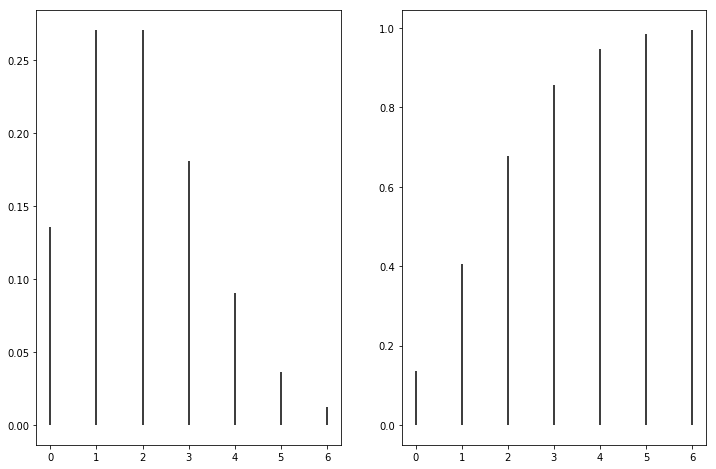

In [15]:
# Poisson distribution
x = np.arange(7)
from scipy.stats import poisson
fig = plt.figure(figsize=(12,8))
axes = fig.subplots(nrows=1, ncols=2)
axes[0].vlines(x, 0, poisson.pmf(x, 2));
axes[1].vlines(x, 0, poisson.cdf(x,2))

In [16]:
# normal distribution
from scipy.stats import norm
import seaborn as sns
x = np.linspace(-10,10,100)

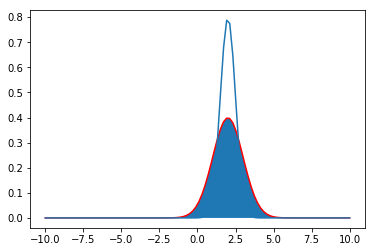

In [17]:
plt.plot(x, norm.pdf(x, loc=2), color='r')
plt.plot(x, norm.pdf(x, loc=2, scale=1/2))
plt.fill_between(x, norm.pdf(x, loc=2))

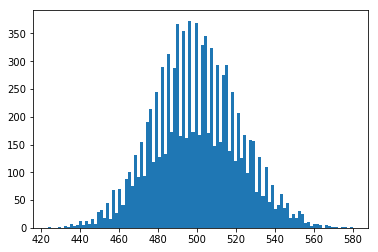

In [18]:
# central limit theorem
# x1 + x2 + ... xn follows Normal distribution if Xi are iid
rvs=poisson(5)
x = np.array([rvs.rvs(size=10000) for i in range(100)])
x_norm = np.sum(x, axis = 0)
plt.hist(x_norm, bins=100);

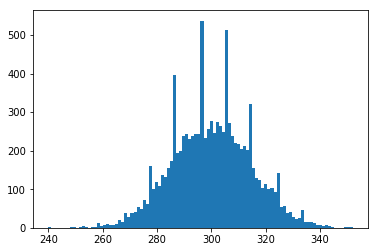

In [23]:
x = np.array([binom(10,0.3).rvs(size=10000) for i in range(100)])
x_norm = np.sum(x, axis = 0)
plt.hist(x_norm, bins=100);

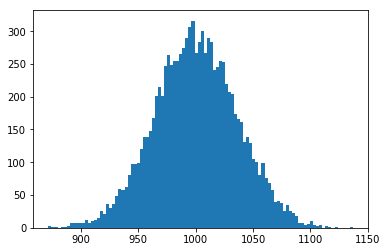

In [26]:
x = np.array([logistic(10,2).rvs(size=10000) for i in range(100)])
x_norm = np.sum(x, axis = 0)
plt.hist(x_norm, bins=100);

Meaning of location and scale of normal distribution in scipy.stats

The probability density function for `norm` is:


$$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}$$

The probability density above is defined in the "standardized" form with mean $\mu=0$, and standard deviation $\sigma = 1$.

To shift and/or scale the distribution use the ``loc`` ($\mu$) and ``scale`` ($\sigma$) parameters.
Specifically, ``norm.pdf(x, loc, scale)`` is identically
equivalent to ``norm.pdf(y) / scale`` with
``y = (x - loc) / scale``.


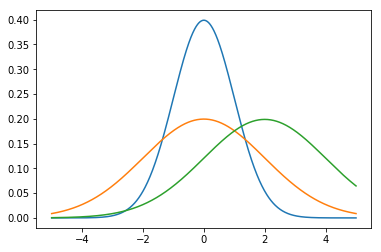

In [56]:
def my_gaussian(x, mean, sigma):
    res = 1/((np.sqrt(2 * pi) * sigma)) * np.exp(-1/(2 * sigma**2) *(x - mean)**2)
    return res

np.random.seed(1)
rv = norm()
x = np.linspace(-5,5,1000)
plt.plot(x, rv.pdf(x))
plt.plot(x, norm.pdf(x, loc=0, scale=2))
plt.plot(x, my_gaussian(x, 2, 2));


In [9]:
from scipy.stats import lognorm

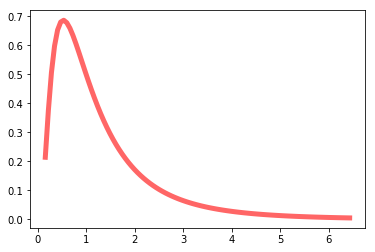

In [19]:
s = 0.8
x = np.linspace(lognorm.ppf(0.01, s),
               lognorm.ppf(0.99, s), 100)
fig, ax = plt.subplots(1,1)
ax.plot(x, lognorm.pdf(x, s),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')

mean 4.0
kurtosis:  0.25
poission(4) has heavier tail than N(4,1)


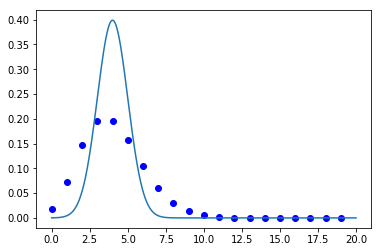

In [35]:
# poisson
x = np.arange(20)
mu = 4
plt.plot(x, poisson(4).pmf(x), 'bo')
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('mean', mean)
print('kurtosis: ', kurt)
xnorm = np.linspace(0,20, 1000)
plt.plot(xnorm, norm(loc=mu).pdf(xnorm));
print('poission(4) has heavier tail than N(4,1)')

# Moment generating functions

The moment generating function (MGF) of an r.v. X is $M(t) = E(e^{tX})$, as a function of t, if this is finite on some open interval (-a,a).

MGF(X) is important due two reasons:
1. it encodes the moments of an r.v. $E(X^n) = M^{(n)}(0)$
2. it determines its distribution, like the CDF and PMF/PDF.
3. MGFs make it easy to find the distribution of a sum of independent r.v.s